In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [22]:
conn = sqlite3.connect('data/badania_inz1.db')
query = "SELECT * FROM t_czerwiec"
df_czerwiec = pd.read_sql_query(query,conn)
query = "SELECT * FROM t_lipiec"
df_lipiec = pd.read_sql_query(query,conn)
query = "SELECT * FROM t_dodatkowa"
df_dodatkowa = pd.read_sql_query(query,conn)


In [114]:
#srednia
mean_czerwiec = df_czerwiec['Wskaznik_zawartosci_chlorofilu'].mean()
mean_lipiec = df_lipiec['Wskaznik_zawartosci_chlorofilu'].mean()
#mediana
median_czerwiec = df_czerwiec['Wskaznik_zawartosci_chlorofilu'].median()
median_lipiec = df_lipiec['Wskaznik_zawartosci_chlorofilu'].median()
#kwartyle
quantil_czerwiec = {df_czerwiec['Wskaznik_zawartosci_chlorofilu'].quantile(0.25),df_czerwiec['Wskaznik_zawartosci_chlorofilu'].quantile(0.5),df_czerwiec['Wskaznik_zawartosci_chlorofilu'].quantile(0.75)}
quantil_lipiec = {df_lipiec['Wskaznik_zawartosci_chlorofilu'].quantile(0.25),df_lipiec['Wskaznik_zawartosci_chlorofilu'].quantile(0.5),df_lipiec['Wskaznik_zawartosci_chlorofilu'].quantile(0.75)}
#odchylenie standardowe
std_czerwiec = df_czerwiec['Wskaznik_zawartosci_chlorofilu'].std()
std_lipiec = df_lipiec['Wskaznik_zawartosci_chlorofilu'].std()
#współczynnik zmienności
cv_czerwiec = (df_czerwiec['Wskaznik_zawartosci_chlorofilu'].std()/df_czerwiec['Wskaznik_zawartosci_chlorofilu'].mean()) * 100
cv_lipiec = (df_lipiec['Wskaznik_zawartosci_chlorofilu'].std()/df_lipiec['Wskaznik_zawartosci_chlorofilu'].mean()) * 100
#kurtoza
kurtosis_czerwiec = df_czerwiec['Wskaznik_zawartosci_chlorofilu'].kurtosis()
kurtosis_lipiec = df_lipiec['Wskaznik_zawartosci_chlorofilu'].kurtosis()
print(kurtosis_czerwiec)

0.5450293035531577


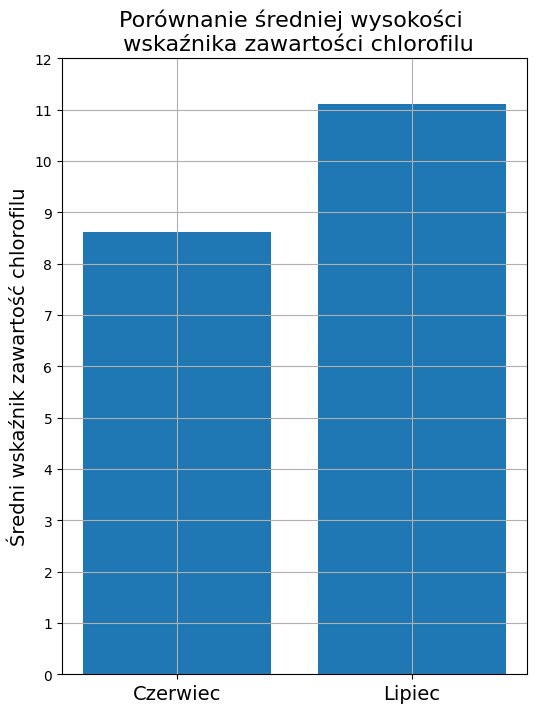

In [151]:

months = ['Czerwiec', 'Lipiec']
values = [mean_czerwiec, mean_lipiec]

plt.figure(figsize=(6, 8))
plt.bar(months, values)
plt.ylabel('Średni wskaźnik zawartość chlorofilu',fontsize=14)
plt.title('Porównanie średniej wysokości \n wskaźnika zawartości chlorofilu',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks([i for i in range(0, 13, 1)])
plt.grid()
plt.show()

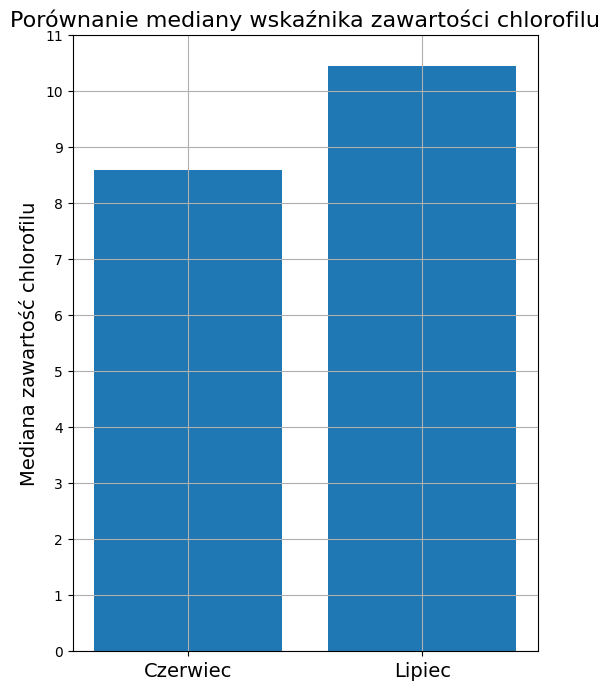

In [152]:
months = ['Czerwiec', 'Lipiec']
values = [median_czerwiec, median_lipiec]

plt.figure(figsize=(6,8))
plt.bar(months, values)
plt.ylabel('Mediana zawartość chlorofilu',fontsize=14)
plt.yticks([i for i in range(0, 12, 1)])
plt.xticks(fontsize=14)
plt.title('Porównanie mediany wskaźnika zawartości chlorofilu',fontsize=16)
plt.grid()
plt.show()

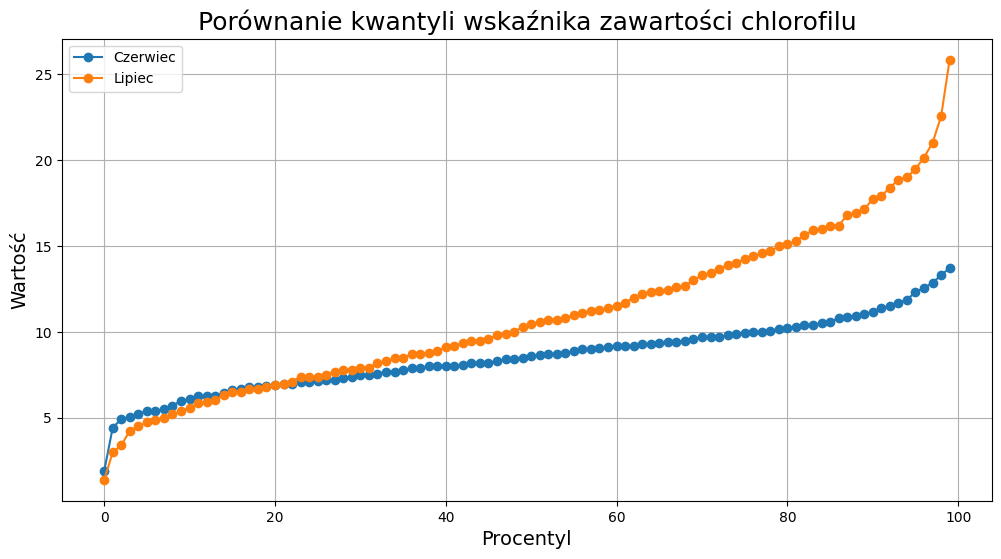

In [155]:

# Przykładowe dane z ramki df_czerwiec (kolumna 'Wskaznik_zawartosci_chlorofilu')
data_czerwiec = df_czerwiec['Wskaznik_zawartosci_chlorofilu']

# Przykładowe dane z ramki df_lipiec (kolumna 'Wskaznik_zawartosci_chlorofilu')
data_lipiec = df_lipiec['Wskaznik_zawartosci_chlorofilu']

# Obliczenie wartości procentylowych dla danych z czerwca i lipca
percentiles = np.arange(0, 100)
percentile_values_czerwiec = np.percentile(data_czerwiec, percentiles)
percentile_values_lipiec = np.percentile(data_lipiec, percentiles)

# Tworzenie wykresu kwantylowego (quantile plot) dla obu miesięcy
plt.figure(figsize=(12, 6))

# Linia dla danych z czerwca
plt.plot(percentiles, percentile_values_czerwiec, marker='o', linestyle='-', label='Czerwiec')

# Linia dla danych z lipca
plt.plot(percentiles, percentile_values_lipiec, marker='o', linestyle='-', label='Lipiec')

plt.xlabel('Procentyl',fontsize=14)
plt.ylabel('Wartość',fontsize=14)
plt.title('Porównanie kwantyli wskaźnika zawartości chlorofilu',fontsize=18)
plt.legend()
plt.grid(True)
plt.show()


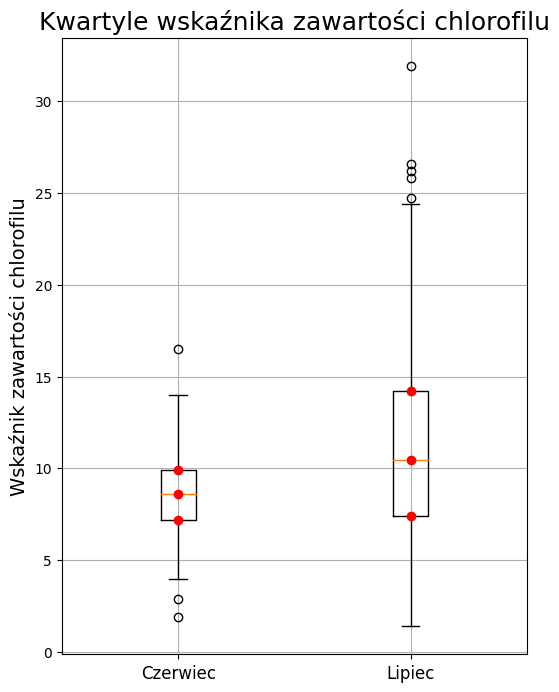

In [158]:


# Kwartyle dla danych z miesiąca czerwiec
quantiles_czerwiec = df_czerwiec['Wskaznik_zawartosci_chlorofilu'].quantile([0.25, 0.5, 0.75])

# Kwartyle dla danych z miesiąca lipiec
quantiles_lipiec = df_lipiec['Wskaznik_zawartosci_chlorofilu'].quantile([0.25, 0.5, 0.75])

# Tworzenie boxplotu porównującego kwartyle między miesiącami
plt.figure(figsize=(6, 8))
plt.boxplot([df_czerwiec['Wskaznik_zawartosci_chlorofilu'], df_lipiec['Wskaznik_zawartosci_chlorofilu']], labels=['Czerwiec', 'Lipiec'])

# Dodawanie linii kwartylowych do boxplotu
plt.scatter([1, 1, 1], quantiles_czerwiec, color='red', zorder=5)  # Linie dla danych z czerwca
plt.scatter([2, 2, 2], quantiles_lipiec, color='red', zorder=5)  # Linie dla danych z lipca
plt.xticks(fontsize=12)
plt.ylabel('Wskaźnik zawartości chlorofilu', fontsize=14)
plt.title('Kwartyle wskaźnika zawartości chlorofilu', fontsize=18)
plt.grid(True)
plt.show()


C:\Users\CeX\AppData\Local\Temp\ipykernel_4416\1960147263.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_czerwiec['Wskaznik_zawartosci_chlorofilu'], label='Czerwiec', shade=True)
C:\Users\CeX\AppData\Local\Temp\ipykernel_4416\1960147263.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_lipiec['Wskaznik_zawartosci_chlorofilu'], label='Lipiec', shade=True)


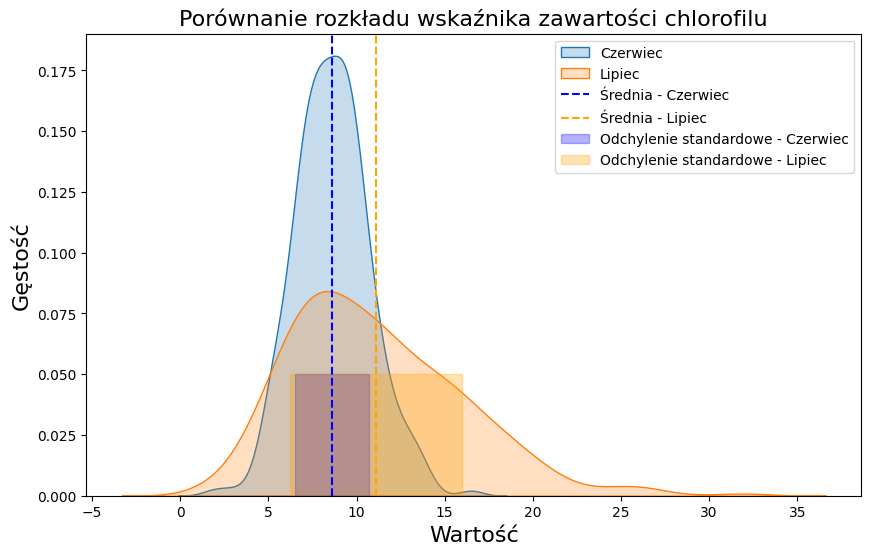

In [160]:
import seaborn as sns

# Ustawienie rozmiaru wykresu
plt.figure(figsize=(10, 6))

# Tworzenie wykresów gęstości dla kolumny 'Wskaznik_zawartosci_chlorofilu' z obu miesięcy
sns.kdeplot(df_czerwiec['Wskaznik_zawartosci_chlorofilu'], label='Czerwiec', shade=True)
sns.kdeplot(df_lipiec['Wskaznik_zawartosci_chlorofilu'], label='Lipiec', shade=True)

# Dodanie linii dla średnich
plt.axvline(df_czerwiec['Wskaznik_zawartosci_chlorofilu'].mean(), color='blue', linestyle='--', label='Średnia - Czerwiec')
plt.axvline(df_lipiec['Wskaznik_zawartosci_chlorofilu'].mean(), color='orange', linestyle='--', label='Średnia - Lipiec')

# Dodanie obszarów dla odchyleń standardowych
plt.fill_betweenx(y=[0, 0.05], x1=df_czerwiec['Wskaznik_zawartosci_chlorofilu'].mean() - df_czerwiec['Wskaznik_zawartosci_chlorofilu'].std(),
                  x2=df_czerwiec['Wskaznik_zawartosci_chlorofilu'].mean() + df_czerwiec['Wskaznik_zawartosci_chlorofilu'].std(),
                  color='blue', alpha=0.3, label='Odchylenie standardowe - Czerwiec')
plt.fill_betweenx(y=[0, 0.05], x1=df_lipiec['Wskaznik_zawartosci_chlorofilu'].mean() - df_lipiec['Wskaznik_zawartosci_chlorofilu'].std(),
                  x2=df_lipiec['Wskaznik_zawartosci_chlorofilu'].mean() + df_lipiec['Wskaznik_zawartosci_chlorofilu'].std(),
                  color='orange', alpha=0.3, label='Odchylenie standardowe - Lipiec')

plt.xlabel('Wartość',fontsize=16)
plt.ylabel('Gęstość',fontsize=16)
plt.title('Porównanie rozkładu wskaźnika zawartości chlorofilu',fontsize=16)
plt.legend()
plt.show()


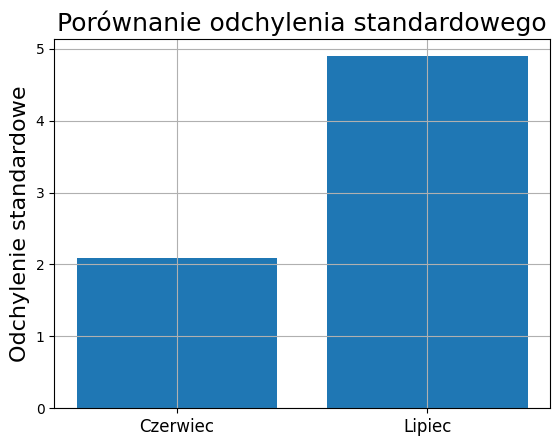

In [161]:


# Obliczanie odchylenia standardowego dla danych z obu miesięcy
std_czerwiec = df_czerwiec['Wskaznik_zawartosci_chlorofilu'].std()
std_lipiec = df_lipiec['Wskaznik_zawartosci_chlorofilu'].std()

# Tworzenie wykresu słupkowego
months = ['Czerwiec', 'Lipiec']
std_values = [std_czerwiec, std_lipiec]

plt.bar(months, std_values)
plt.ylabel('Odchylenie standardowe',fontsize=16)
plt.xticks(fontsize=12)
plt.title('Porównanie odchylenia standardowego',fontsize=18)
plt.grid()
plt.show()


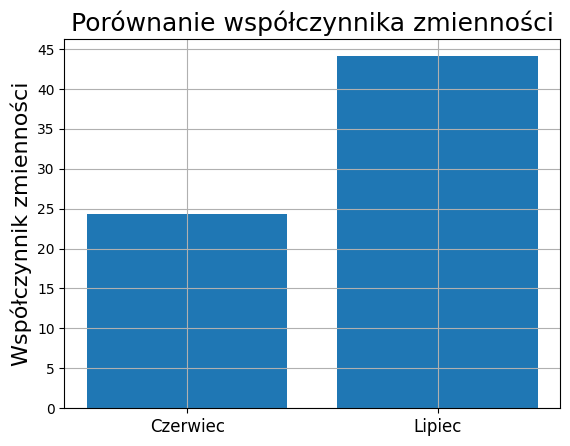

In [162]:
months = ['Czerwiec', 'Lipiec']
cv_values = [cv_czerwiec, cv_lipiec]

plt.bar(months, cv_values)
plt.ylabel('Współczynnik zmienności',fontsize=16)
plt.title('Porównanie współczynnika zmienności',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks([i for i in range(0, 50, 5)])
plt.grid()
plt.show()

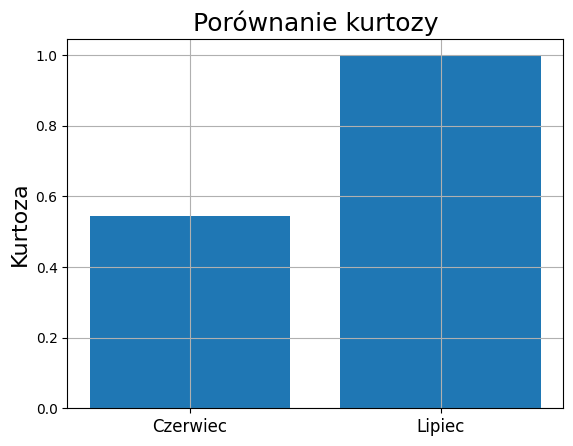

In [163]:

# Obliczenie kurtozy dla obu zbiorów danych
kurtosis_czerwiec = df_czerwiec['Wskaznik_zawartosci_chlorofilu'].kurtosis()
kurtosis_lipiec = df_lipiec['Wskaznik_zawartosci_chlorofilu'].kurtosis()

# Stworzenie wykresu słupkowego porównującego kurtozę
months = ['Czerwiec', 'Lipiec']
kurtosis_values = [kurtosis_czerwiec, kurtosis_lipiec]

plt.bar(months, kurtosis_values)
plt.ylabel('Kurtoza',fontsize=16)
plt.xticks(fontsize=12)
plt.title('Porównanie kurtozy',fontsize=18)
plt.grid()
plt.show()


In [90]:
kombinacja_czerwiec = df_czerwiec.groupby('Umiejscowienie_proby')['Wskaznik_zawartosci_chlorofilu'].apply(list)
print(kombinacja_czerwiec)

Umiejscowienie_proby
1    [7.3, 6.9, 2.9, 8.2, 9.9, 13.7, 10.1, 9.1, 1.9...
2    [13.9, 7.5, 6.0, 10.8, 9.4, 9.8, 8.3, 11.4, 8....
3    [6.6, 6.3, 6.1, 8.6, 11.1, 11.5, 8.0, 10.4, 8....
4    [8.0, 9.1, 7.1, 11.1, 8.0, 12.5, 10.3, 11.0, 4...
Name: Wskaznik_zawartosci_chlorofilu, dtype: object


In [89]:
kombinacja_lipiec = df_lipiec.groupby('Umiejscowienie_proby')['Wskaznik_zawartosci_chlorofilu'].apply(list)
print(kombinacja_lipiec)

Umiejscowienie_proby
1    [13.3, 18.9, 17.1, 5.2, 10.7, 17.9, 16.0, 8.2,...
2    [15.1, 12.3, 7.8, 14.6, 16.2, 7.3, 19.1, 5.9, ...
3    [12.0, 17.7, 6.5, 18.0, 9.8, 18.5, 15.4, 8.7, ...
4    [19.0, 4.9, 21.8, 4.7, 14.0, 14.4, 9.8, 18.4, ...
Name: Wskaznik_zawartosci_chlorofilu, dtype: object


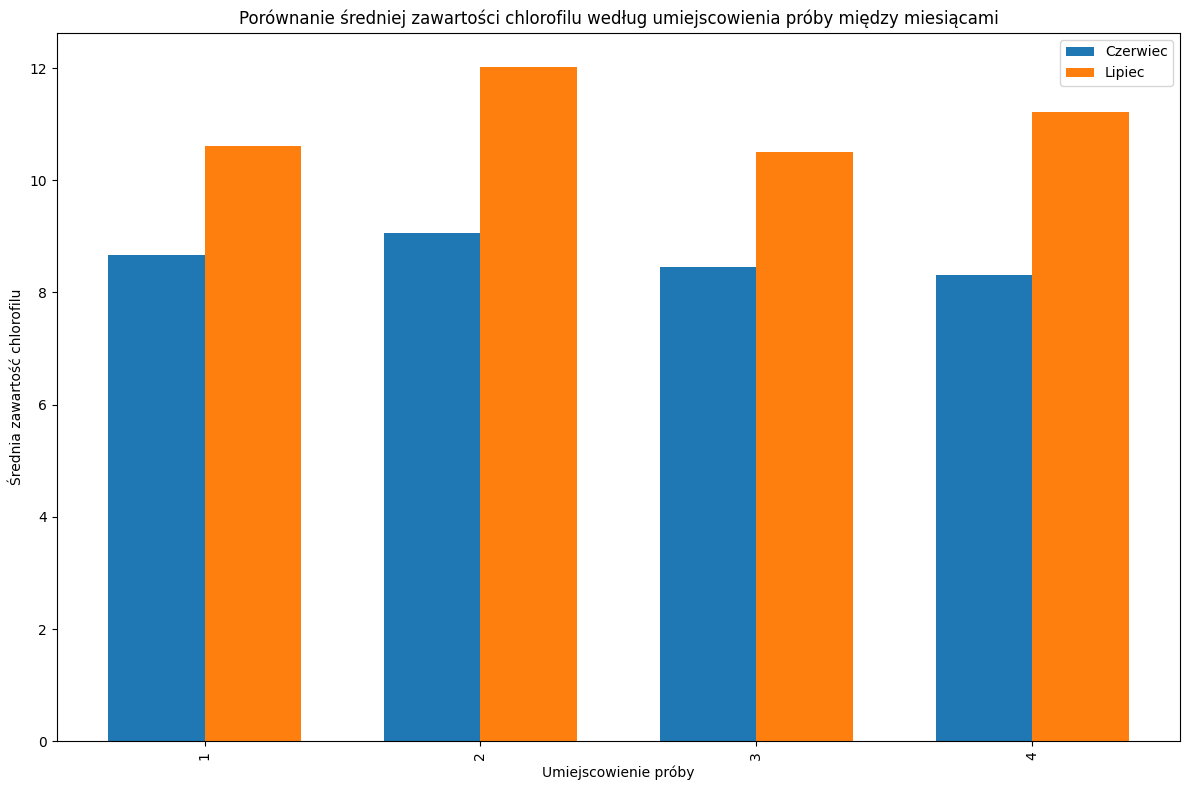

In [93]:
import matplotlib.pyplot as plt

# Obliczenie średniej zawartości chlorofilu dla umiejscowienia próby w czerwcu i lipcu
mean_chlorofil_czerwiec = kombinacja_czerwiec.apply(lambda x: sum(x) / len(x))
mean_chlorofil_lipiec = kombinacja_lipiec.apply(lambda x: sum(x) / len(x))

# Uzyskanie unikalnych umiejscowień prób
locations = list(set(list(kombinacja_czerwiec.index) + list(kombinacja_lipiec.index)))

# Utworzenie list wartości średniej zawartości chlorofilu dla czerwca i lipca dla każdego umiejscowienia próby
values_czerwiec = [mean_chlorofil_czerwiec[loc] if loc in mean_chlorofil_czerwiec.index else 0 for loc in locations]
values_lipiec = [mean_chlorofil_lipiec[loc] if loc in mean_chlorofil_lipiec.index else 0 for loc in locations]

# Utworzenie wykresu słupkowego
bar_width = 0.35
index = range(len(locations))

plt.figure(figsize=(12, 8))
plt.bar(index, values_czerwiec, bar_width, label='Czerwiec')
plt.bar([i + bar_width for i in index], values_lipiec, bar_width, label='Lipiec')

plt.xlabel('Umiejscowienie próby')
plt.ylabel('Średnia zawartość chlorofilu')
plt.title('Porównanie średniej zawartości chlorofilu według umiejscowienia próby między miesiącami')
plt.xticks([i + bar_width / 2 for i in index], locations, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
